# TP Integrador SQL + Python

# Primera parte - Trabajando con **pandas**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carga de archivos CSV en DataFrames de pandas

customers =       pd.read_csv('./data/ecommerce_customers_dataset.csv')
order_items =     pd.read_csv('./data/ecommerce_order_items_dataset.csv')
order_payments =  pd.read_csv('./data/ecommerce_order_payments_dataset.csv')
orders =          pd.read_csv('./data/ecommerce_orders_dataset.csv')
products =        pd.read_csv('./data/ecommerce_products_dataset.csv')

In [4]:
# Establecer la columna índices de las tablas como la clave primaria en el DataFrame

customers.set_index(['customer_id'], inplace=True)
order_items.set_index(['order_id'], inplace=True)
order_payments.set_index(['order_id'], inplace=True)
orders.set_index(['order_id'], inplace=True)
products.set_index(['product_id'], inplace=True)

In [5]:
order_items.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# Obtener el número total de clientes únicos en el conjunto de datos
customers['customer_unique_id'].nunique()

96096

In [7]:
order_payments.head()

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
# Calcular el promedio de valor de pago por pedido
order_payments.groupby(order_payments.index)['payment_value'].mean().sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    13664.080000
736e1922ae60d0d6a89247b851902527     7274.880000
0812eb902a67711a1cb742b3cdaa65ae     6929.310000
fefacc66af859508bf1a7934eab1e97f     6922.210000
f5136e38d1a14a4dbd87dff67da82701     6726.660000
                                        ...     
285c2e15bebd4ac83635ccc563dc71f4        1.856818
d744783ed2ace06cac647a9e64dcbcfd        1.737500
00b1cb0320190ca0daa2c88b35206009        0.000000
c8c528189310eaa44a745b8d9d26908b        0.000000
4637ca194b6387e2d538dc89b124b0ee        0.000000
Name: payment_value, Length: 99440, dtype: float64

In [9]:
# Determinar la categoría de producto más vendida
products.head(2)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
order_items.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
order_items['product_id'].value_counts()

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: count, Length: 32951, dtype: int64

In [12]:
pd.merge(left=order_items, right=products, how='inner', on='product_id')['product_category_name'].value_counts().head(1)

product_category_name
cama_mesa_banho    11115
Name: count, dtype: int64

In [13]:
# Calcular el número total de pedidos realizados
orders.shape[0]

99441

In [14]:
order_items.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
orders.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Segunda parte - Trabajando con **SQLite3**

## Pruebitas para ver si funcionaba!

In [ ]:
query = '''
  CREATE TABLE tablita (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre VARCHAR(50),
    edad INT
  );
'''
cur.execute(query)

In [ ]:
query_insertar = '''
  INSERT INTO tablita
    (nombre, edad)
  VALUES
    ('Gustavo', 35),
    ('Agustina', 33)
  ;
'''
cur.execute(query_insertar)

In [ ]:
query_1 = '''
  SELECT *
  FROM tablita;
'''
resultado = cur.execute(query_1).fetchall()
for res in resultado:
  print(res)

(1, 'Gustavo', 35)
(2, 'Agustina', 33)


In [ ]:
# Y ahora dropeamos todo para poder arrancar
query_1 = '''
  DROP TABLE tablita;
'''
cur.execute(query_1)

In [ ]:
'''
Haciendo esto puedo crear tablas en SQL a partir de los DataFrame

ecommerce_customers.to_sql(     name='customers', con=conn, if_exists='append', index=False)
ecommerce_order_items.to_sql(   name='order_items', con=conn, if_exists='append', index=False)
ecommerce_order_payments.to_sql(name='order_payments', con=conn, if_exists='append', index=False)
ecommerce_orders.to_sql(        name='orders', con=conn, if_exists='append', index=False)
ecommerce_products.to_sql(      name='products', con=conn, if_exists='append', index=False)
'''

"\nHaciendo esto puedo crear tablas en SQL a partir de los DataFrame\n\necommerce_customers.to_sql(     name='customers', con=conn, if_exists='append', index=False)\necommerce_order_items.to_sql(   name='order_items', con=conn, if_exists='append', index=False)\necommerce_order_payments.to_sql(name='order_payments', con=conn, if_exists='append', index=False)\necommerce_orders.to_sql(        name='orders', con=conn, if_exists='append', index=False)\necommerce_products.to_sql(      name='products', con=conn, if_exists='append', index=False)\n"

## Arrancamos con la parte de SQL

### Crear una base de datos de SQLite llamada ecommerce.db

In [16]:
import sqlite3

In [17]:
conn = sqlite3.connect('ecommerce.db')
cur = conn.cursor()

In [ ]:
cur.close()

### Guardar los DataFrames en la base de datos como tablas, incluyendo la clave primaria

In [18]:
# creamos las tablas en la BBDD
create_tables = '''
CREATE TABLE customers (
    customer_id TEXT PRIMARY KEY,
    customer_unique_id TEXT,
    customer_zip_code_prefix INTEGER,
    customer_city TEXT,
    customer_state TEXT
);
CREATE TABLE order_items (
    order_id TEXT,
    order_item_id INTEGER,
    product_id TEXT,
    seller_id TEXT,
    shipping_limit_date TEXT,
    price REAL,
    freight_value REAL,
    PRIMARY KEY (order_id, order_item_id)
);
CREATE TABLE order_payments (
    order_id TEXT,
    payment_sequential INTEGER,
    payment_type TEXT,
    payment_installments INTEGER,
    payment_value REAL,
    PRIMARY KEY(order_id,payment_sequential)
);
CREATE TABLE orders (
    order_id TEXT PRIMARY KEY,
    customer_id TEXT,
    order_status TEXT,
    order_purchase_timestamp TEXT,
    order_approved_at TEXT,
    order_delivered_carrier_date TEXT,
    order_delivered_customer_date TEXT,
    order_estimated_delivery_date TEXT
);
CREATE TABLE products (
    product_id TEXT PRIMARY KEY,
    product_category_name TEXT,
    product_name_lenght REAL,
    product_description_lenght REAL,
    product_photos_qty REAL,
    product_weight_g REAL,
    product_length_cm REAL,
    product_height_cm REAL,
    product_width_cm REAL
);
'''

In [19]:
cur.executescript(create_tables)

In [20]:
# Ingestamos las tablas
customers.to_sql(     name='customers', con=conn, if_exists='append', index=True)
order_items.to_sql(   name='order_items', con=conn, if_exists='append', index=True)
order_payments.to_sql(name='order_payments', con=conn, if_exists='append', index=True)
orders.to_sql(        name='orders', con=conn, if_exists='append', index=True)
products.to_sql(      name='products', con=conn, if_exists='append', index=True)

32951

#### Probamos si se lograron meter en la BBDD

In [21]:
for algo in cur.execute('select * from customers limit 10;').fetchall():
    print(algo)

('06b8999e2fba1a1fbc88172c00ba8bc7', '861eff4711a542e4b93843c6dd7febb0', 14409, 'franca', 'SP')
('18955e83d337fd6b2def6b18a428ac77', '290c77bc529b7ac935b93aa66c333dc3', 9790, 'sao bernardo do campo', 'SP')
('4e7b3e00288586ebd08712fdd0374a03', '060e732b5b29e8181a18229c7b0b2b5e', 1151, 'sao paulo', 'SP')
('b2b6027bc5c5109e529d4dc6358b12c3', '259dac757896d24d7702b9acbbff3f3c', 8775, 'mogi das cruzes', 'SP')
('4f2d8ab171c80ec8364f7c12e35b23ad', '345ecd01c38d18a9036ed96c73b8d066', 13056, 'campinas', 'SP')
('879864dab9bc3047522c92c82e1212b8', '4c93744516667ad3b8f1fb645a3116a4', 89254, 'jaragua do sul', 'SC')
('fd826e7cf63160e536e0908c76c3f441', 'addec96d2e059c80c30fe6871d30d177', 4534, 'sao paulo', 'SP')
('5e274e7a0c3809e14aba7ad5aae0d407', '57b2a98a409812fe9618067b6b8ebe4f', 35182, 'timoteo', 'MG')
('5adf08e34b2e993982a47070956c5c65', '1175e95fb47ddff9de6b2b06188f7e0d', 81560, 'curitiba', 'PR')
('4b7139f34592b3a31687243a302fa75b', '9afe194fb833f79e300e37e580171f22', 30575, 'belo horizonte',

### Ejecutar una consulta PRAGMA para obtener la estructura de las tablas y guardar la info a un archivo con extensión .info

In [22]:
with open('./estructuras_tablas.info', 'w') as file:
    for tablita in cur.execute('pragma table_info(customers);').fetchall():
        print(tablita, file=file)

## Obtener los nombres de los índices de las tablas y guardar la info a un archivo con extensión .info

In [23]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
nombre_tablas = cur.fetchall()

with open('indices_tablas.info', 'w') as file:
    for tabla in nombre_tablas:
        tabla = tabla[0]
        pragma_query = f"PRAGMA index_list({tabla});"
        cur.execute(pragma_query)
        index_info = cur.fetchall()

        file.write(f"Índices de la tabla '{tabla}':\n")
        for index in index_info:
            print(index, file=file)

## Usando consultas SELECT que involucren joins y agrupaciones para obtener información valiosa respondiendo a las siguientes necesidades:

### Analizar el comportamiento de compra de los clientes:

- Utilizar los datos de los customers, orders y order_items
- Calcula el valor promedio de los pedidos realizados por cada cliente
- Identifica a los clientes con los pedidos de mayor valor
- Calcular la frecuencia promedio de compra por cliente, es decir, la cantidad de pedidos realizados en un período de tiempo determinado
- Generar un informe que muestre los clientes más frecuentes y su promedio de frecuencia de compra.

In [24]:
# Calcula el valor promedio de los pedidos realizados por cada cliente
query_1 = '''
    SELECT
        c.customer_unique_id AS Cliente,
        avg(oi.price + oi.freight_value) AS precio_promedio
    FROM orders as o
    INNER JOIN customers AS c
        ON o.customer_id = c.customer_id
    INNER JOIN order_items AS oi
        ON o.order_id = oi.order_id
    GROUP BY Cliente
    ORDER BY precio_promedio DESC
    -- LIMIT 5
;
'''
# consulta = cur.execute(query_1).fetchall()
# for linea in consulta:
#     print(linea)


query_1_df = pd.read_sql_query(query_1, conn)
query_1_df.head()

,Cliente,precio_promedio
0,dc4802a71eae9be1dd28f5d788ceb526,6929.31
1,459bef486812aa25204be022145caa62,6922.21
2,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66
3,eebb5dda148d3893cdaf5b5ca3040ccb,4764.34
4,48e1ac109decbb87765a3eade6854098,4681.78


In [36]:
# Pasamos el output de la query a un archivo CSV para posterior análisis
query_1_df.to_csv('./csv_salida/promedio_pedidos_x_cada_cliente.csv', index=False)

In [26]:
# Identifica a los clientes con los pedidos de mayor valor
query_2 = '''
    SELECT
        c.customer_unique_id AS Cliente,
        max(oi.price + oi.freight_value) AS pedidos_mayor_valor
    FROM orders as o
    INNER JOIN customers AS c
        ON o.customer_id = c.customer_id
    INNER JOIN order_items AS oi
        ON o.order_id = oi.order_id
    GROUP BY Cliente
    ORDER BY pedidos_mayor_valor DESC
    LIMIT 5
;
'''
consulta = pd.read_sql_query(query_2, conn)
consulta

,Cliente,pedidos_mayor_valor
0,dc4802a71eae9be1dd28f5d788ceb526,6929.31
1,459bef486812aa25204be022145caa62,6922.21
2,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66
3,da122df9eeddfedc1dc1f5349a1a690c,4950.34
4,eebb5dda148d3893cdaf5b5ca3040ccb,4764.34


<Axes: title={'center': 'Cilentes con los pedidos de mayor valor'}, xlabel='Cliente'>

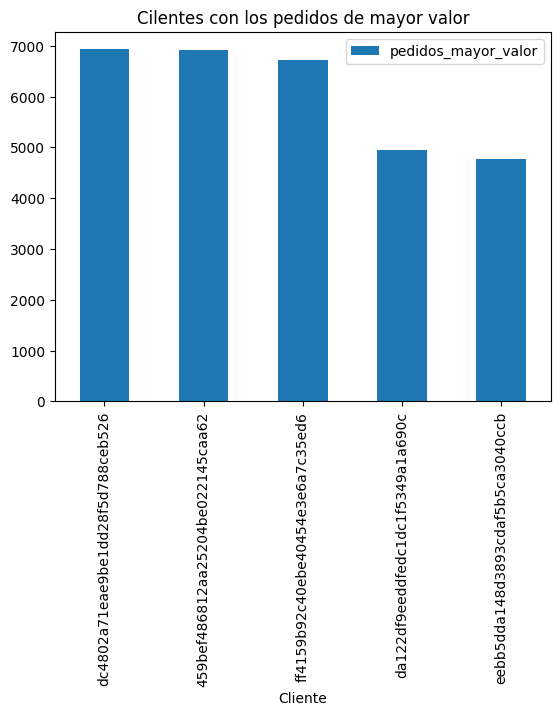

In [27]:
consulta.plot(kind='bar', x='Cliente', y='pedidos_mayor_valor', title='Cilentes con los pedidos de mayor valor')

In [37]:
# Calcular la frecuencia promedio de compra por cliente, es decir, la cantidad de pedidos realizados en un período de tiempo determinado
query_3 = '''
    SELECT
        c.customer_unique_id AS id_cliente,
        count(o.order_id) AS total_ordenes,
        (julianday(MAX(o.order_purchase_timestamp)) - julianday(MIN(o.order_purchase_timestamp))) / (count(o.order_id) - 1) AS frecuencia_promedio
    FROM
        customers AS c
    INNER JOIN orders AS o
        ON c.customer_id = o.customer_id
    GROUP BY c.customer_unique_id
    HAVING frecuencia_promedio > 0
    ORDER BY frecuencia_promedio DESC
;
'''
frec = pd.read_sql_query(query_3, conn)
frec.head()

# Pasamos el output de la query a un archivo CSV para posterior análisis
frec.to_csv('./csv_salida/frecuencia_prom_por_cliente.csv', index=False)

### Realizar un análisis de popularidad de productos por categoría:

- Utilizar datos de los archivos products y order_items
- Agrupar los productos por categoría y calcula la cantidad total de unidades vendidas para cada categoría
- Generar un informe que muestre las categorías de productos más populares en términos de ventas

In [29]:
# Agrupar los productos por categoría y calcula la cantidad total de unidades vendidas para cada categoría
query_4 = '''
    SELECT
        p.product_category_name AS Categoria,
        COUNT(oi.product_id) AS Cantidad
    FROM order_items AS oi
    INNER JOIN products AS p
        ON oi.product_id = p.product_id
    GROUP BY Categoria
    ORDER BY Cantidad DESC
    LIMIT 5
;
'''
consulta = cur.execute(query_4).fetchall()
for linea in consulta:
    print(linea)

('cama_mesa_banho', 11115)
('beleza_saude', 9670)
('esporte_lazer', 8641)
('moveis_decoracao', 8334)
('informatica_acessorios', 7827)


### Realizar un análisis de la satisfacción del cliente basado en la velocidad de entrega:

- Utiliza datos de los archivos customers y orders
- Calcula el tiempo promedio de entrega de los pedidos por cliente
- Genera un informe que muestre los clientes con los tiempos de entrega más rápidos y más lentos

In [30]:
# Calcula el tiempo promedio de entrega de los pedidos por cliente
query_5 = '''
    SELECT
        c.customer_unique_id AS Cliente,
        round(avg(julianday(o.order_estimated_delivery_date) - julianday(o.order_purchase_timestamp)), 2) AS Tiempo
    FROM orders AS o
    INNER JOIN customers AS c
        ON o.customer_id = c.customer_id
    GROUP BY Cliente
    ORDER BY Tiempo DESC
    LIMIT 5
;
'''
query_5_df = pd.read_sql_query(query_5, conn)
query_5_df

,Cliente,Tiempo
0,f83958e993a7f2c3fb301981bbf6deb6,155.14
1,85895a0452aba21c4bb0e5b0e1b5e6eb,149.59
2,31954fc2c9d7b714d49ee440cc8ab01f,146.25
3,3977f83a14549e6265bcded84e92ee80,144.90
4,cb9aa3a6c7716acf0af57d3622616fef,144.36


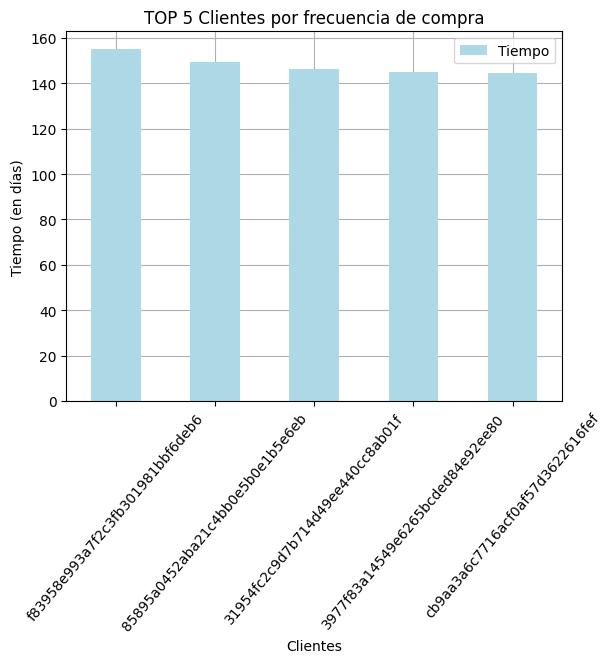

In [31]:
query_5_df.plot(kind='bar', x='Cliente', y='Tiempo', color='lightblue', zorder=2)

plt.title('TOP 5 Clientes por frecuencia de compra')
plt.xticks(rotation=50)
plt.xlabel('Clientes')
plt.ylabel('Tiempo (en días)')
plt.grid(True)

plt.show()

### Analizar el rendimiento de los métodos de pago utilizados por los clientes:

- Utilizar datos de los archivos customers y order_payments
- Agrupar los pagos por método de pago y calcula el total de pagos realizados con cada método
- Generar un informe que muestre los métodos de pago más utilizados por los clientes

In [32]:
order_payments.head(1)

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [33]:
# Agrupar los pagos por método de pago y calcula el total de pagos realizados con cada método
query_6 = '''
    SELECT
        op.payment_type AS Tipo_Pago,
        count(o.order_id) AS Cant
    FROM orders AS o
    INNER JOIN order_payments AS op
        ON o.order_id = op.order_id
    GROUP BY Tipo_Pago
    ORDER BY Cant DESC
    LIMIT 5
;
'''
consulta = cur.execute(query_6).fetchall()
for linea in consulta:
    print(linea)

('credit_card', 76795)
('boleto', 19784)
('voucher', 5775)
('debit_card', 1529)
('not_defined', 3)
